In [1]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
import twint

In [4]:
import re
import string

In [5]:
from nltk.corpus import stopwords

In [6]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [8]:
from textblob import TextBlob

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
from wordcloud import WordCloud, STOPWORDS 
from PIL import Image

In [12]:
import nest_asyncio

In [13]:
nest_asyncio.apply()

# Uncomment below cell!!!

In [14]:
# Configure
c = twint.Config()
c.Username = "voguemagazine"
c.Since = "2020-01-01"
c.Until = "2020-07-01"
c.Store_csv = True
c.Output = "voguemagazine"

# Run
twint.run.Search(c)

In [15]:
#c

In [16]:
df_all_info_tweets = pd.read_csv('voguemagazine/tweets.csv')

In [17]:
df_all_info_tweets

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1277748739491454977,1277748739491454977,2020-06-29 16:40:13 PDT,2020-06-29,16:40:13,-800,136361303,voguemagazine,Vogue Magazine,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1277741076506427392,1277741076506427392,2020-06-29 16:09:46 PDT,2020-06-29,16:09:46,-800,136361303,voguemagazine,Vogue Magazine,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1277735264606195712,1277735264606195712,2020-06-29 15:46:40 PDT,2020-06-29,15:46:40,-800,136361303,voguemagazine,Vogue Magazine,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1277728986907455489,1277728986907455489,2020-06-29 15:21:44 PDT,2020-06-29,15:21:44,-800,136361303,voguemagazine,Vogue Magazine,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1277721201675309056,1277721201675309056,2020-06-29 14:50:48 PDT,2020-06-29,14:50:48,-800,136361303,voguemagazine,Vogue Magazine,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,1212199987012153345,1212199987012153345,2019-12-31 18:32:53 PST,2019-12-31,18:32:53,-800,136361303,voguemagazine,Vogue Magazine,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9446,1212192155973902337,1212192155973902337,2019-12-31 18:01:46 PST,2019-12-31,18:01:46,-800,136361303,voguemagazine,Vogue Magazine,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9447,1212184513490640896,1212184513490640896,2019-12-31 17:31:23 PST,2019-12-31,17:31:23,-800,136361303,voguemagazine,Vogue Magazine,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9448,1212176343871475712,1212176343871475712,2019-12-31 16:58:56 PST,2019-12-31,16:58:56,-800,136361303,voguemagazine,Vogue Magazine,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


## Data cleaning

In [18]:
df_all_info_tweets.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [19]:
# copy of database with date and tweet
df = df_all_info_tweets.loc[:,['date', 'tweet']]

In [20]:
df.tweet.iloc[0] 

'If you’re looking to revamp your yoga or home-workout routine, Vogue Beauty editor @akiliking_ shares why she considers this the perfect mat.  https://t.co/OF9EkbSizw'

Tweet has link at the end, I'll delete it

In [21]:
for i, tweet in enumerate(df['tweet']):
    df['tweet'].iloc[i] = tweet.rsplit(' ', 1)[0]

In [22]:
df.tweet.iloc[0]

'If you’re looking to revamp your yoga or home-workout routine, Vogue Beauty editor @akiliking_ shares why she considers this the perfect mat. '

## Text preprocessing

In [23]:
# Compound Term Extraction
repl = lambda x: x.replace('new york', 'new_york').replace('fashion week', 'fashion_week').replace('new year', 'new_year').replace('self care', 'self_care')

# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())


df['tweet'] = df.tweet.map(alphanumeric).map(punc_lower).map(repl)
df.head()

,date,tweet
0,2020-06-29,if you’re looking to revamp your yoga or home ...
1,2020-06-29,from soothing meditations to supplements and t...
2,2020-06-29,warriors in the garden’s warriorsitg livia ...
3,2020-06-29,fast fashion may be getting cheaper while luxu...
4,2020-06-29,all of the apps classes and workouts that ca...


In [24]:
# removing stop words from the text
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"']
stop += ['http', 'https', 'co', 'see', 'editor', 'writer', 'vogue', 'best', 'look', 'one', 'may', 'make']
stop = set(stop)

## Document-Term Matrix

In [25]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams

vectorizer = CountVectorizer(stop_words = stop)

doc_word = vectorizer.fit_transform(df.tweet)

pd.DataFrame(doc_word.toarray(), columns=vectorizer.get_feature_names()).head()

,aaronsorkin,ababa,abandoned,abba,abbey,abby,abdi,abe,aberfan,abetting,...,zoom,zoomtopia,zoë,zukin,zuri,zwirner,àcheval,álvarez,ísis,ýrúrarí
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
doc_word.shape

(9450, 11433)

In [27]:
# def display_topics(model, feature_names, no_top_words, topic_names=None):
# '''
#     helping function to display topics
# '''
#     for ix, topic in enumerate(model.components_):
#         if not topic_names or not topic_names[ix]:
#             print("\nTopic ", ix)
#         else:
#             print("\nTopic: '",topic_names[ix],"'")
#         print(", ".join([feature_names[i]
#                         for i in topic.argsort()[:-no_top_words - 1:-1]]))

## Topic modeling

I'm gonna try NMF and LSA topic modeling and compare them to each other

### Non-Negative Matrix Factorization (NMF) 

In [28]:
nmf_model = NMF(12)
doc_topic_nmf = nmf_model.fit_transform(doc_word)
doc_topic_nmf.shape

(9450, 12)

The **doc_topic** matrix shows us the documents we started with, and how each document is made up of the 12 resulting topics. We don't know yet what the topics are.

In [29]:
topic_word_nmf = nmf_model.components_
topic_word_nmf.shape

(12, 11433)

In [30]:
topic_word_nmf

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.95024725e-05, 0.00000000e+00, 2.04368800e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.55495918e-04, 3.84015907e-04, 0.00000000e+00, ...,
        9.67983241e-03, 0.00000000e+00, 0.00000000e+00],
       [1.51160105e-04, 0.00000000e+00, 1.50250418e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.68067092e-04, 4.15806783e-04, 4.63793701e-03, ...,
        0.00000000e+00, 0.00000000e+00, 2.54921845e-03]])

The **topic_word_nmf** matrix shows us the 12 resulting topics, and the terms that are associated with each topic. By looking at the words below, we an figure out what the topics are.

In [31]:
words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-7:-1]
topic_words_nmf = [[words[e] for e in l] for l in t]
topic_words_nmf

[['new', 'series', 'video', 'collection', 'brand', 'book'],
 ['time', 'lot', 'life', 'self_care', 'shares', 'first'],
 ['red', 'carpet', 'oscars', 'goldenglobes', 'grammys', 'arrivals'],
 ['fashion', 'designers', 'brands', 'show', 'industry', 'years'],
 ['home', 'stay', 'work', 'go', 'perfect', 'share'],
 ['like', 'world', 'us', 'says', 'looked', 'voguepostcardsfromhome'],
 ['beauty', 'shares', 'routine', 'makeup', 'watch', 'step'],
 ['black', 'owned', 'support', 'women', 'brands', 'businesses'],
 ['style', 'fashion_week', 'paris', 'street', 'take', 'show'],
 ['year', 'first', 'old', 'metgala', 'oscars', 'made'],
 ['day', 'valentine', 'wedding', 'gift', 'world', 'mother'],
 ['coronavirus', 'new_york', 'love', 'need', 'pandemic', 'covid']]

In [32]:
doc_topic_nmf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.0067441 ,
        0.        ],
       [0.00032135, 0.00601756, 0.00125014, ..., 0.00992882, 0.00632792,
        0.00255505],
       [0.00197271, 0.00873752, 0.00301182, ..., 0.00557564, 0.        ,
        0.01224062],
       ...,
       [0.        , 0.        , 0.        , ..., 0.18572928, 0.        ,
        0.        ],
       [0.00064749, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00282587],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00827863]])

The H matrix shows us the documents we started with, and how each document is made up of the 12 resulting topics. In this case:
- The first document seems to be about TV, 
- Second about Selfcare 
- Red Carpet
- Brands
- Stay home
- Love life
- Beauty
- BLM
- Fashion week
- Oscar 
- Love 
- The last document seems to be about Pandemic
- Everything in between is a combination of the 12

In [33]:
H = pd.DataFrame(doc_topic_nmf.round(5),
                 index = df.tweet
                )
H

,0,1,2,3,4,5,6,7,8,9,10,11
tweet,,,,,,,,,,,,
if you’re looking to revamp your yoga or home workout routine vogue beauty editor akiliking shares why she considers this the perfect mat,0.00000,0.00000,0.00000,0.00000,0.26625,0.00000,0.29774,0.00120,0.00000,0.00000,0.00674,0.00000
from soothing meditations to supplements and teas here are approaches to get a sounder night’s sleep,0.00032,0.00602,0.00125,0.00000,0.00000,0.00000,0.04319,0.00000,0.01210,0.00993,0.00633,0.00256
warriors in the garden’s warriorsitg livia rose johnson sees hair as an invaluable means of self expression,0.00197,0.00874,0.00301,0.00000,0.01245,0.01429,0.02138,0.00000,0.00000,0.00558,0.00000,0.01224
fast fashion may be getting cheaper while luxury gets more expensive–but it comes down to ethical labor fabric quality and profit margins,0.00000,0.00563,0.00000,0.23331,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00714,0.00000
all of the apps classes and workouts that can help you maintain a super active lifestyle from home,0.00000,0.00000,0.00000,0.00038,0.26822,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.01543
...,...,...,...,...,...,...,...,...,...,...,...,...
vogue staffers on the movies that affected them most this decade,0.00193,0.00000,0.00000,0.00536,0.00000,0.00000,0.00000,0.00000,0.00000,0.00507,0.01186,0.00410
treat yourself in,0.00021,0.00000,0.00000,0.00053,0.00000,0.00000,0.00004,0.00000,0.00000,0.00000,0.00072,0.00000
in dualipa had a breakout year not only with her music but also her style,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.14988,0.18573,0.00000,0.00000


### Latent Semantic Analysis (LSA)

In [34]:
# Acronynms: Latent Semantic Analysis (LSA) is just another name for 
#  Signular Value Decomposition (SVD) applied to Natural Language Processing (NLP)
lsa = TruncatedSVD(10)
doc_topic_lsa = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.00518908, 0.00733246, 0.00694337, 0.00629705, 0.00559055,
       0.00504641, 0.00480596, 0.00457358, 0.00440517, 0.00402242])

In [35]:
doc_topic_lsa

array([[ 5.56041018e-01,  3.12979443e-01, -3.73005104e-01, ...,
        -3.67635424e-01, -2.07098731e-01, -3.68080837e-02],
       [ 1.23888795e-01,  5.25013663e-02, -2.14450460e-02, ...,
        -1.68004244e-01,  4.73557033e-02,  5.42454958e-02],
       [ 1.18655906e-01,  3.31925032e-02, -9.86217698e-03, ...,
        -7.04355651e-02, -5.91783605e-02, -2.63411771e-03],
       ...,
       [ 2.69737954e-01,  1.54327871e-01,  5.73907693e-02, ...,
        -1.49099412e-01,  6.20244116e-01,  2.99991486e-01],
       [ 7.51931994e-03, -5.02600410e-03,  7.31027012e-04, ...,
         1.02834749e-03, -1.60174808e-03, -1.89079052e-04],
       [ 2.07591346e-01,  1.38972295e-01, -1.47245662e-01, ...,
        -1.56657152e-01,  7.57197757e-02,  7.18219916e-02]])

The Vt matrix shows us the documents we started with, and how each document is made up of the 2 resulting topics. In this case:
- The first four documents seem to be about sports
- The last three documents seem to be about music

In [36]:
Vt = pd.DataFrame(doc_topic_lsa.round(5),
             index = df.tweet)
Vt

,0,1,2,3,4,5,6,7,8,9
tweet,,,,,,,,,,
if you’re looking to revamp your yoga or home workout routine vogue beauty editor akiliking shares why she considers this the perfect mat,0.55604,0.31298,-0.37301,-0.77741,-0.91590,0.35523,0.81625,-0.36764,-0.20710,-0.03681
from soothing meditations to supplements and teas here are approaches to get a sounder night’s sleep,0.12389,0.05250,-0.02145,-0.07630,0.03182,-0.08291,0.09139,-0.16800,0.04736,0.05425
warriors in the garden’s warriorsitg livia rose johnson sees hair as an invaluable means of self expression,0.11866,0.03319,-0.00986,-0.12879,0.03031,0.00174,0.07385,-0.07044,-0.05918,-0.00263
fast fashion may be getting cheaper while luxury gets more expensive–but it comes down to ethical labor fabric quality and profit margins,0.41024,0.25777,-0.42965,0.68981,-0.11582,0.11411,-0.14680,-0.09116,-0.12632,-0.01550
all of the apps classes and workouts that can help you maintain a super active lifestyle from home,0.25445,0.12342,-0.18843,-0.45983,-0.70945,0.38243,-0.21641,0.18527,0.07523,-0.01163
...,...,...,...,...,...,...,...,...,...,...
vogue staffers on the movies that affected them most this decade,0.03376,-0.00485,-0.00552,0.01525,0.00097,-0.01635,-0.02135,0.00212,-0.00656,0.03827
treat yourself in,0.00195,-0.00116,-0.00027,0.00222,-0.00111,0.00016,0.00002,-0.00069,-0.00089,0.00150
in dualipa had a breakout year not only with her music but also her style,0.26974,0.15433,0.05739,-0.08504,0.01511,-0.38802,-0.29547,-0.14910,0.62024,0.29999


In [37]:
words = vectorizer.get_feature_names()
t_lsa = lsa.components_.argsort(axis=1)[:,-1:-7:-1]
topic_words_lsa = [[words[e] for e in l] for l in t_lsa]
topic_words_lsa

[['new', 'fashion', 'time', 'home', 'like', 'beauty'],
 ['red', 'carpet', 'fashion', 'oscars', 'beauty', 'home'],
 ['red', 'carpet', 'new', 'oscars', 'goldenglobes', 'grammys'],
 ['fashion', 'new', 'carpet', 'red', 'brands', 'owned'],
 ['time', 'black', 'first', 'life', 'lot', 'love'],
 ['time', 'home', 'black', 'fashion', 'lot', 'new'],
 ['beauty', 'black', 'routine', 'makeup', 'shares', 'watch'],
 ['black', 'women', 'home', 'owned', 'world', 'like'],
 ['style', 'black', 'fashion_week', 'street', 'paris', 'take'],
 ['year', 'day', 'first', 'oscars', 'old', 'valentine']]

#### NMF shows better result than LSA

## Sentiment Analisys

I wanna do Sentiment analisys to see if mood of the topics was changed after pandemic started. Because I heard some media was writing more positive articles to support people

In [38]:
sid_obj = SentimentIntensityAnalyzer()
sentiment = []
for tweet in df.tweet:
    sentiment.append(sid_obj.polarity_scores(tweet))

In [39]:
sentiment

[{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'compound': 0.8658},
 {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.3818},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.7351},
 {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.8519},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'compound': 0.4404},
 {'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'compound': 0.3612},
 {'neg': 0.045, 'neu': 0.679, 'pos': 0.276, 'compound': 0.8807},
 {'neg': 0.066, 'neu': 0.934, 'pos': 0.0, 'compound': -0.4019},
 {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.7351},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.149, 'neu': 0.678, 'pos': 0.173, 'compound': 0.0649},
 {'neg': 0.181, 'neu': 0.778, 'pos': 0.041, 'compound': -0.7579},
 {'neg': 0.127, 'neu': 0.636, 'pos': 0.237, 'compound': 0.7184},
 {'neg': 0.087, 'neu': 0.851, 'pos': 0.062, 'compound': -0.0516},


In [40]:
df_sentiment = pd.concat([df,pd.DataFrame(sentiment)], axis=1)

In [41]:
df_sentiment

,date,tweet,neg,neu,pos,compound
0,2020-06-29,if you’re looking to revamp your yoga or home ...,0.000,0.673,0.327,0.8658
1,2020-06-29,from soothing meditations to supplements and t...,0.000,0.795,0.205,0.3818
2,2020-06-29,warriors in the garden’s warriorsitg livia ...,0.000,1.000,0.000,0.0000
3,2020-06-29,fast fashion may be getting cheaper while luxu...,0.000,0.763,0.237,0.7351
4,2020-06-29,all of the apps classes and workouts that ca...,0.000,0.617,0.383,0.8519
...,...,...,...,...,...,...
9445,2019-12-31,vogue staffers on the movies that affected the...,0.138,0.862,0.000,-0.1531
9446,2019-12-31,treat yourself in,0.000,0.426,0.574,0.4019
9447,2019-12-31,in dualipa had a breakout year not only wi...,0.000,1.000,0.000,0.0000
9448,2019-12-31,do you hate hearing recordings of yourself yo...,0.256,0.623,0.120,-0.4515


In [42]:
df_sentiment.to_csv('sentimentc.csv',index=False) 

In [43]:
df_compound = \
    (df_sentiment
     .groupby(['date'])[['date', 'compound']]
     .mean()
     .reset_index())

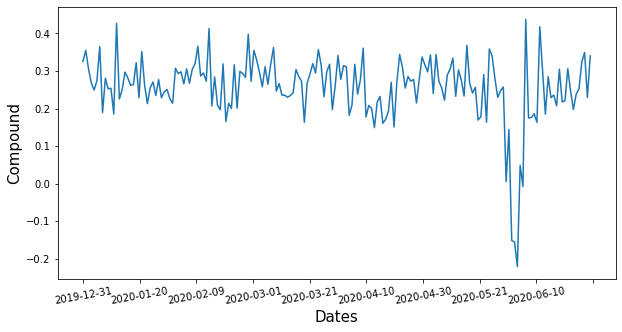

In [44]:
plt.figure(figsize=(10,5))

plt.plot(df_compound['date'], df_compound['compound'])
#plt.grid()
ticks_x = np.linspace(0, df_compound.shape[0], 10)
plt.xticks(ticks_x, rotation=10)

#plt.title('Daily time series for station 34 ST-PENN STA',fontsize = 20, weight='bold',color='b')
plt.ylabel('Compound', fontsize = 15, color='black')
plt.xlabel('Dates', fontsize = 15, color='black')
plt.savefig('compound.png');

Interesting! Very negative articles(comparing usual) in some period of time. What happaned on this date?

In [45]:
#finding the dates for negative articles
df_compound[df_compound['compound'] < 0]

,date,compound
153,2020-06-01,-0.151137
154,2020-06-02,-0.155083
155,2020-06-03,-0.220195
157,2020-06-05,-0.007500


Let's look at tweeets

In [46]:
df[df['date']== '2020-06-01']

,date,tweet
1094,2020-06-01,while some joined the protests in major cities...
1095,2020-06-01,the majority of the small brands were struggli...
1096,2020-06-01,there s plenty to learn from flatbush in par...
1097,2020-06-01,in this time of national trauma when the cov...
1098,2020-06-01,racism is a global issue racism is a british...
1099,2020-06-01,new_york is the latest city to adopt a curfew ...
1100,2020-06-01,in response to thousands of arrests during the...
1101,2020-06-01,there s plenty to learn from flatbush in par...
1102,2020-06-01,in this time of national trauma when the cov...
1103,2020-06-01,barack and michelle obama’s powerful statement...


It was a lot of articles about BLM protests. What was interesting to know that fashion magazine write about political stuff

## EDA

In [47]:
doc_word.shape

(9450, 11433)

In [48]:
df_EDA = pd.DataFrame(doc_word.toarray(), columns=vectorizer.get_feature_names())

In [49]:
df_EDA['tweet_date']= df.date

In [50]:
df_EDA

,aaronsorkin,ababa,abandoned,abba,abbey,abby,abdi,abe,aberfan,abetting,...,zoomtopia,zoë,zukin,zuri,zwirner,àcheval,álvarez,ísis,ýrúrarí,tweet_date
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-06-29
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-06-29
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-06-29
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-06-29
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2019-12-31
9446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2019-12-31
9447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2019-12-31
9448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2019-12-31


In [51]:
# create a new df that count docs that have word 'zoom' daily
df_zoom = \
    (df_EDA
     .groupby(['tweet_date'])[['tweet_date', 'zoom']]
     .sum()
     .reset_index())

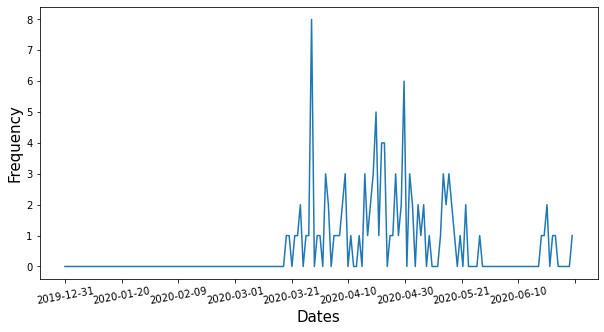

In [52]:
plt.figure(figsize=(10,5))

plt.plot(df_zoom['tweet_date'], df_zoom['zoom'])
#plt.grid()
ticks_x = np.linspace(0, df_zoom.shape[0], 10)
plt.xticks(ticks_x, rotation=10)

#plt.title('Daily time series for station 34 ST-PENN STA',fontsize = 20, weight='bold',color='b')
plt.ylabel('Frequency', fontsize = 15, color='black')
plt.xlabel('Dates', fontsize = 15, color='black');
#plt.savefig('zoom.png');

In [53]:
# create a new df that counts docs that have word 'home' daily
df_home = \
    (df_EDA
     .groupby(['tweet_date'])[['tweet_date', 'home']]
     .sum()
     .reset_index())

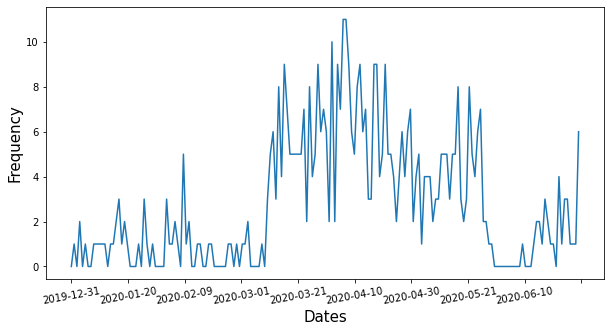

In [54]:
plt.figure(figsize=(10,5))

plt.plot(df_home['tweet_date'], df_home['home'])
#plt.grid()
ticks_x = np.linspace(0, df_home.shape[0], 10)
plt.xticks(ticks_x, rotation=10)

#plt.title('Daily time series for station 34 ST-PENN STA',fontsize = 20, weight='bold',color='b')
plt.ylabel('Frequency', fontsize = 15, color='black')
plt.xlabel('Dates', fontsize = 15, color='black');
#plt.savefig('home.png');

In [55]:
# # create a new df that count docs that have word 'black' daily
df_black = \
    (df_EDA.loc[:,['tweet_date', 'black']]
     .groupby(['tweet_date'])[['tweet_date', 'black']]
     .sum()
     .reset_index())

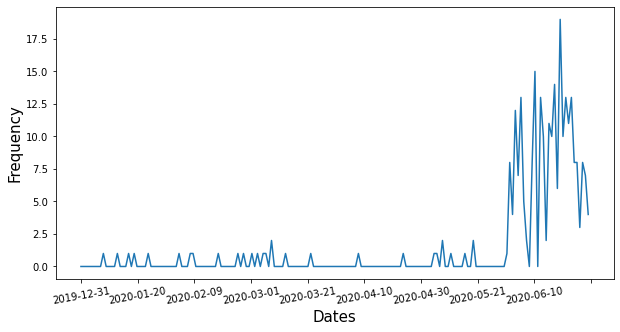

In [56]:
plt.figure(figsize=(10,5))

plt.plot(df_black['tweet_date'], df_black['black'])
#plt.grid()
ticks_x = np.linspace(0, df_black.shape[0], 10)
plt.xticks(ticks_x, rotation=10)

#plt.title('Daily time series for station 34 ST-PENN STA',fontsize = 20, weight='bold',color='b')
plt.ylabel('Frequency', fontsize = 15, color='black')
plt.xlabel('Dates', fontsize = 15, color='black');
#plt.savefig('black.png');

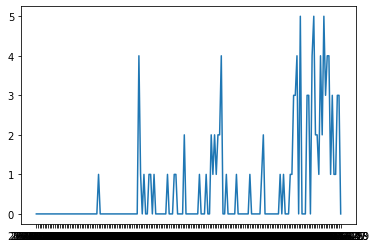

In [57]:
# create a new df that counts docs that have word 'support' daily
df_support = \
    (df_EDA.loc[:,['tweet_date', 'support']]
     .groupby(['tweet_date'])[['tweet_date', 'support']]
     .sum()
     .reset_index())

plt.plot(df_support['tweet_date'], df_support['support'])

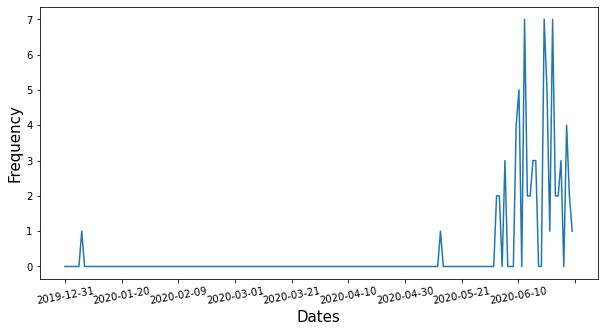

In [58]:
# create a new df that count docs that have word 'owned' daily
df_owned = \
    (df_EDA.loc[:,['tweet_date', 'owned']]
     .groupby(['tweet_date'])[['tweet_date', 'owned']]
     .sum()
     .reset_index())

plt.figure(figsize=(10,5))

plt.plot(df_owned['tweet_date'], df_owned['owned'])
#plt.grid()
ticks_x = np.linspace(0, df_owned.shape[0], 10)
plt.xticks(ticks_x, rotation=10)

#plt.title('Daily time series for station 34 ST-PENN STA',fontsize = 20, weight='bold',color='b')
plt.ylabel('Frequency', fontsize = 15, color='black')
plt.xlabel('Dates', fontsize = 15, color='black');
#plt.savefig('owned.png');

## Visualisation

### WordCloud (150 top words)


First count frequency of each word and sort it

In [59]:
df_words = pd.DataFrame(doc_word.toarray(), columns=vectorizer.get_feature_names())

In [60]:
df_words = \
    (df_words.sum())

In [61]:
word_sorted = df_words.sort_values(ascending=False)
word_sorted

new            722
fashion        579
home           511
time           424
like           343
              ... 
laggies          1
laguardia        1
lahijan          1
lak              1
aaronsorkin      1
Length: 11433, dtype: int64

Creating shape for word cloud and generating word cloud from frequency

In [62]:
custom_mask = np.array(Image.open("q2.png"))

In [63]:
wordcloud = WordCloud(background_color="white", mask = custom_mask, stopwords=stop)
                      #, contour_width=1)
                      #, contour_color='black')
wordcloud.generate_from_frequencies(frequencies=word_sorted[:150])

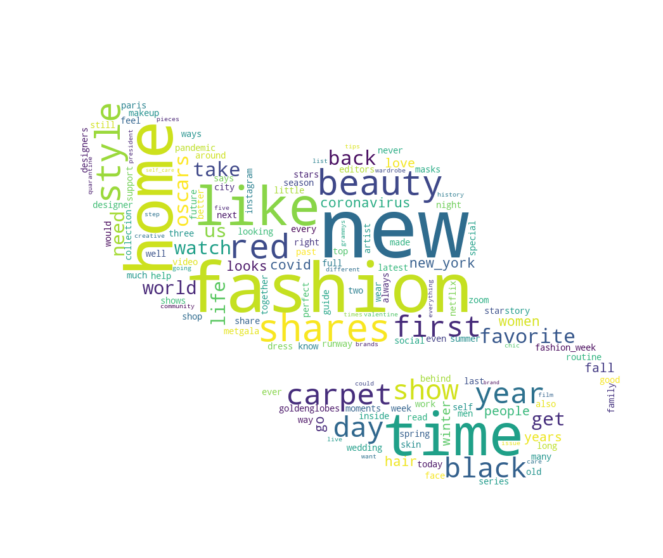

In [64]:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### More visualisations

Find popularity of topics

In [65]:
topic_words_nmf

[['new', 'series', 'video', 'collection', 'brand', 'book'],
 ['time', 'lot', 'life', 'self_care', 'shares', 'first'],
 ['red', 'carpet', 'oscars', 'goldenglobes', 'grammys', 'arrivals'],
 ['fashion', 'designers', 'brands', 'show', 'industry', 'years'],
 ['home', 'stay', 'work', 'go', 'perfect', 'share'],
 ['like', 'world', 'us', 'says', 'looked', 'voguepostcardsfromhome'],
 ['beauty', 'shares', 'routine', 'makeup', 'watch', 'step'],
 ['black', 'owned', 'support', 'women', 'brands', 'businesses'],
 ['style', 'fashion_week', 'paris', 'street', 'take', 'show'],
 ['year', 'first', 'old', 'metgala', 'oscars', 'made'],
 ['day', 'valentine', 'wedding', 'gift', 'world', 'mother'],
 ['coronavirus', 'new_york', 'love', 'need', 'pandemic', 'covid']]

In [66]:
list_topic = ['TV', 'Selfcare', 'Red Carpet', 'Brands', 'Stay home', 'Love life',
             'Beauty', 'BLM', 'Fashion week', 'Oscar', 'Love', 'Pandemic']

In [67]:
df_topic_time = df_all_info_tweets.loc[:,['date']]

In [68]:
df_topic_time['topic']= doc_topic_nmf.argmax(axis=1)

In [69]:
for i, el in enumerate(df_topic_time.topic):
    df_topic_time.topic.iloc[i] = list_topic[el]

/Users/albinasitdikova/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [70]:
df_topic_time['tweet']=df.tweet

In [71]:
df_topic_time.to_csv('topics.csv',index=False) 

Visualisation an Tableau

In [72]:
df_topic_time

,date,topic,tweet
0,2020-06-29,Beauty,if you’re looking to revamp your yoga or home ...
1,2020-06-29,Beauty,from soothing meditations to supplements and t...
2,2020-06-29,Beauty,warriors in the garden’s warriorsitg livia ...
3,2020-06-29,Brands,fast fashion may be getting cheaper while luxu...
4,2020-06-29,Stay home,all of the apps classes and workouts that ca...
...,...,...,...
9445,2019-12-31,Love,vogue staffers on the movies that affected the...
9446,2019-12-31,Love,treat yourself in
9447,2019-12-31,Oscar,in dualipa had a breakout year not only wi...
9448,2019-12-31,Pandemic,do you hate hearing recordings of yourself yo...


In [73]:
df_topic_describe =pd.DataFrame()

In [74]:
df_topic_describe['topic']=list_topic

In [75]:
df_topic_describe['words'] = topic_words_nmf

In [76]:
df_topic_describe

,topic,words
0,TV,"[new, series, video, collection, brand, book]"
1,Selfcare,"[time, lot, life, self_care, shares, first]"
2,Red Carpet,"[red, carpet, oscars, goldenglobes, grammys, a..."
3,Brands,"[fashion, designers, brands, show, industry, y..."
4,Stay home,"[home, stay, work, go, perfect, share]"
5,Love life,"[like, world, us, says, looked, voguepostcards..."
6,Beauty,"[beauty, shares, routine, makeup, watch, step]"
7,BLM,"[black, owned, support, women, brands, busines..."
8,Fashion week,"[style, fashion_week, paris, street, take, show]"
9,Oscar,"[year, first, old, metgala, oscars, made]"


In [77]:
df_topic_describe.to_csv('topic_desc.csv',index=False) 

In [78]:
df_topic_time.topic.value_counts()

Pandemic        1943
Fashion week    1347
Beauty           994
Oscar            983
Stay home        748
Love life        628
Red Carpet       574
BLM              498
Brands           497
TV               467
Love             446
Selfcare         325
Name: topic, dtype: int64

In [79]:
df_counts = pd.DataFrame(df_topic_time.topic.value_counts())

In [80]:
df_counts

,topic
Pandemic,1943
Fashion week,1347
Beauty,994
Oscar,983
Stay home,748
Love life,628
Red Carpet,574
BLM,498
Brands,497
TV,467


Barchart numbers of documents by Dominant Topic

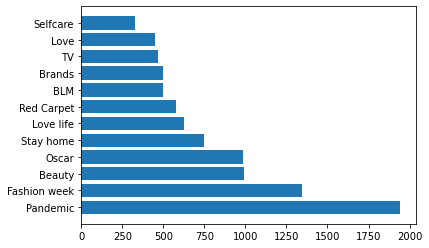

In [81]:
plt.barh(df_counts.index, df_counts.topic)
plt.savefig('distr.png')

#### Result:
During analysis I found the most popular topics vogues write about and it’s not only about fashion but politic sometimes too
This information could be useful for social media, to make better advertising for users who reads vogue And it will help to put right advertising 
